## Analyse de l'évolution d'un indice de production

## Partie 1 : Importance des données

In [79]:
# Importation des fichiers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_glaces_val = pd.read_csv("/home/onyxia/work/Bases-python/02-exercices/data/serie_glaces_valeurs.csv", skiprows=4, delimiter=';', names = ["periode", "indice", "code"])
df_glaces_metadata = pd.read_csv("/home/onyxia/work/Bases-python/02-exercices/data/serie_glaces_metadonnees.csv", skiprows=5, delimiter=';', names = ["code", "signification"])

df_glaces_val


,periode,indice,code
0,2023-09,(s),Q
1,2023-08,115.7,P
2,2023-07,115.6,P
3,2023-06,115.3,A
4,2023-05,112.4,A
...,...,...,...
196,2007-05,113.4,A
197,2007-04,113.0,A
198,2007-03,115.3,A
199,2007-02,115.6,A


In [46]:
df_glaces_metadata 

,code,signification
0,Q,Couvert par le secret statistique
1,E,Estimation
2,F,Prévision
3,P,Provisoire
4,SD,Valeur semi-définitive
5,R,Révision
6,A,Valeur normale
7,N,Valeur non significative
8,O,Valeur manquante
9,U,Valeur atypique


## Partie 2 : Filtrage des données pertinentes

In [47]:
# Fusion de deux DataTrames afin de récup la signification des codes présents dans les données

df_combine = pd.merge(df_glaces_metadata, df_glaces_val)
df_glaces_metadata 


,code,signification
0,Q,Couvert par le secret statistique
1,E,Estimation
2,F,Prévision
3,P,Provisoire
4,SD,Valeur semi-définitive
5,R,Révision
6,A,Valeur normale
7,N,Valeur non significative
8,O,Valeur manquante
9,U,Valeur atypique


In [48]:
## Filtrer les données de sorte a ne conserver que les données de type "Valeur normale"

df_filtred = df_combine[df_combine['code']== "A"]
df_filtred = df_combine[['periode', "indice"]]
df_filtred

,periode,indice
0,2023-09,(s)
1,2023-08,115.7
2,2023-07,115.6
3,2023-06,115.3
4,2023-05,112.4
...,...,...
196,2007-05,113.4
197,2007-04,113.0
198,2007-03,115.3
199,2007-02,115.6


## Partie 3 : Pré-traitement des données

In [54]:
# verifions si les types des var sont pertinents selon leur nature
df_filtred['indice'] = df_filtred['indice'].replace(['(s)', 's', 'S', ''], np.nan)
df_filtred.info()
df_filtred['periode'] = pd.to_datetime(df_filtred['periode'])
df_filtred['indice'] = pd.to_numeric(df_filtred['indice'])
df_filtred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   periode  201 non-null    datetime64[ns]
 1   indice   200 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   periode  201 non-null    datetime64[ns]
 1   indice   200 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.3 KB


/tmp/ipykernel_51618/2932607845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtred['indice'] = df_filtred['indice'].replace(['(s)', 's', 'S', ''], np.nan)
/tmp/ipykernel_51618/2932607845.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtred['periode'] = pd.to_datetime(df_filtred['periode'])
/tmp/ipykernel_51618/2932607845.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [57]:
df_filtred.head()
df_filtred = df_filtred.dropna()
df_filtred

,periode,indice
1,2023-08-01,115.7
2,2023-07-01,115.6
3,2023-06-01,115.3
4,2023-05-01,112.4
5,2023-04-01,115.5
...,...,...
196,2007-05-01,113.4
197,2007-04-01,113.0
198,2007-03-01,115.3
199,2007-02-01,115.6


## Partie 4 : Calcul de l'évolution glissante sur 12 mois

In [66]:
# Utilisez la méthode shift() pour créer une nouvelle colonne qui contiendra l'indice du trimestre précédent

df_filtred['indice T-1'] = df_filtred['indice'].shift(1)

df_filtred['evolution'] = ((df_filtred['indice T-1'] - df_filtred['indice']) / df_filtred['indice'])*100
df_filtred

/tmp/ipykernel_51618/1971997683.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtred['indice T-1'] = df_filtred['indice'].shift(1)
/tmp/ipykernel_51618/1971997683.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtred['evolution'] = ((df_filtred['indice T-1'] - df_filtred['indice']) / df_filtred['indice'])*100


,periode,indice,indice T-1,evolution
1,2023-08-01,115.7,NaN,NaN
2,2023-07-01,115.6,115.7,0.086505
3,2023-06-01,115.3,115.6,0.260191
4,2023-05-01,112.4,115.3,2.580071
5,2023-04-01,115.5,112.4,-2.683983
...,...,...,...,...
196,2007-05-01,113.4,113.8,0.352734
197,2007-04-01,113.0,113.4,0.353982
198,2007-03-01,115.3,113.0,-1.994796
199,2007-02-01,115.6,115.3,-0.259516


## Partie 5 : Calcul de l'évolution glissante sur 12 mois

In [73]:
df_filtred['glissemnt annuel'] = df_filtred['indice'].pct_change(periods=12)*100
df_filtred.head(20)
df_filtred.tail()

/tmp/ipykernel_51618/1439948350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtred['glissemnt annuel'] = df_filtred['indice'].pct_change(periods=12)*100


,periode,indice,indice T-1,evolution,glissemnt annuel
196,2007-05-01,113.4,113.8,0.352734,-8.326597
197,2007-04-01,113.0,113.4,0.353982,-8.723748
198,2007-03-01,115.3,113.0,-1.994796,-5.336617
199,2007-02-01,115.6,115.3,-0.259516,-4.145937
200,2007-01-01,116.4,115.6,-0.687285,-3.161398


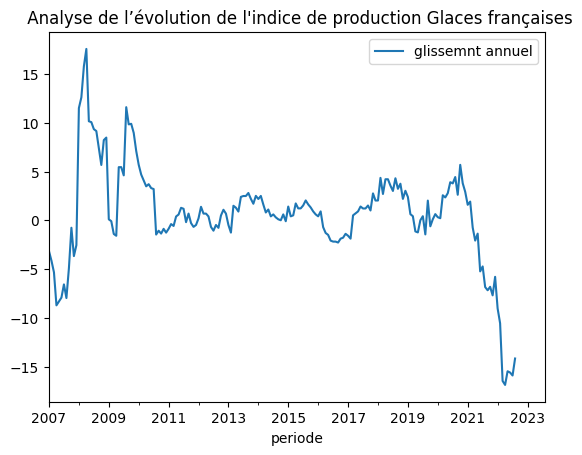

In [81]:
df_filtred.plot(x='periode', y='glissemnt annuel', kind='line',
title=" Analyse de l’évolution de l'indice de production Glaces françaises")
plt.show()

## Exports output

In [75]:
df_filtred.to_csv('data/output.csv', index=False)